##Emotion detection:
https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer

Tamaño: 35.9k



*   Train: 24.282
    * Angry: 3995
    * Disgusted: 436
    * Fearful: 4097
    * Happy: 7215
    * Neutral: 4965
    * Sad: 4830
    * surprised: 3171

*   Test: 7178








In [ ]:
#@title **Load libs** { display-mode: "form" }
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "Proyecto IA" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1RJdbXAWiwID162JN0IevNCxkN1GB4qOj/Proyecto IA


#Conectar con kaggle (despues de ejecutarse una vez ya no es necesario)

In [ ]:
!pip install kaggle

In [ ]:
ruta_del_archivo = "/content/drive/MyDrive/Proyecto IA/kaggle.json"

with open(ruta_del_archivo) as f:
  # hacer algo con el archivo, como imprimir su contenido
  print(f.read())

{"username":"carlosg0328","key":"47e18ba5eb4c048c4556b9bab3b8f6dd"}


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:

!kaggle datasets download -d ananthu017/emotion-detection-fer

emotion-detection-fer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "emotion-detection-fer.zip"
with ZipFile(file_name,"r") as zip:
  zip.extractall()
  print("done")


KeyboardInterrupt: ignored

#Cargar el dataset

In [ ]:
import os
import cv2
import numpy as np

def cargar_dataset(ruta_dataset):
    imagenes = []
    etiquetas = []

    # Ruta completa de la carpeta "train"
    ruta_train = os.path.join('/content/drive/MyDrive', ruta_dataset, 'train')

    for nombre_clase in os.listdir(ruta_train):
        carpeta_clase = os.path.join(ruta_train, nombre_clase)
        if not os.path.isdir(carpeta_clase):
            continue

        for nombre_archivo in os.listdir(carpeta_clase):
            archivo = os.path.join(carpeta_clase, nombre_archivo)
            imagen = cv2.imread(archivo, cv2.IMREAD_GRAYSCALE)

            if imagen is not None:
                imagenes.append(imagen)
                etiquetas.append(nombre_clase)

    # Ruta completa de la carpeta "test"
    ruta_test = os.path.join('/content/drive/MyDrive', ruta_dataset, 'test')

    for nombre_clase in os.listdir(ruta_test):
        carpeta_clase = os.path.join(ruta_test, nombre_clase)
        if not os.path.isdir(carpeta_clase):
            continue

        for nombre_archivo in os.listdir(carpeta_clase):
            archivo = os.path.join(carpeta_clase, nombre_archivo)
            imagen = cv2.imread(archivo, cv2.IMREAD_GRAYSCALE)

            if imagen is not None:
                imagenes.append(imagen)
                etiquetas.append(nombre_clase)

    return np.array(imagenes), np.array(etiquetas)

ruta_dataset = "/content/drive/MyDrive/Proyecto IA"  # Reemplaza con la ruta real de tu dataset en Google Drive

imagenes, etiquetas = cargar_dataset(ruta_dataset)

# Verificar el tamaño del dataset
print("Número de imágenes:", len(imagenes))
print("Número de etiquetas:", len(etiquetas))




Número de imágenes: 35380
Número de etiquetas: 35380


In [ ]:
from joblib import dump
from joblib import load
imagenes, etiquetas= load('/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset1.pkl')
print("Número de imágenes:", len(imagenes))
print("Número de etiquetas:", len(etiquetas))

Número de imágenes: 35660
Número de etiquetas: 35660


##Guardar los datos:

In [ ]:
from joblib import dump

# Guardar el conjunto de datos en un archivo
dump((imagenes, etiquetas), '/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset1.pkl')

# Cargar el conjunto de datos desde el archivo
#imagenes_cargadas, etiquetas_cargadas = joblib.load('/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset.pkl')

['/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset1.pkl']

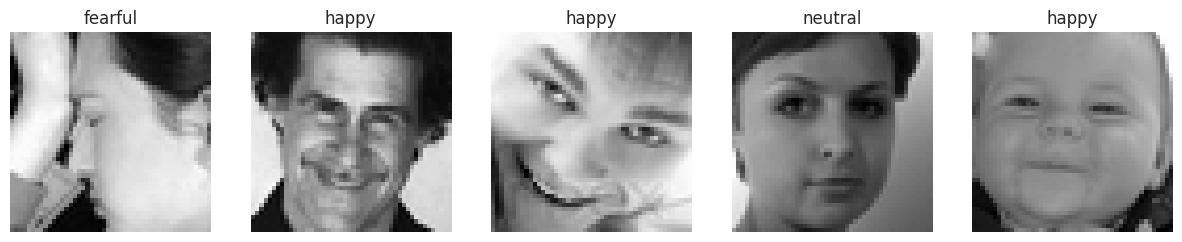

In [ ]:
import matplotlib.pyplot as plt

def visualizar_imagenes(imagenes, etiquetas, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(etiqueta)
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_imagenes(imagenes, etiquetas, num_imagenes_visualizar)


In [ ]:
from sklearn.model_selection import train_test_split

# Separar el 10% de los datos en una nueva variable
datos, datosV, etiquetas, etiquetasV = train_test_split(imagenes, etiquetas, test_size=0.1, random_state=42)

# Verificar el tamaño de los conjuntos de datos
print("Tamaño del conjunto de datos:", len(datos))
print("Tamaño del conjunto de validación:", len(datosV))


Tamaño del conjunto de datos: 32094
Tamaño del conjunto de validación: 3566


In [ ]:
from joblib import dump

# Guardar el conjunto de datos en un archivo
dump((datos, datosV, etiquetas, etiquetasV), '/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/datasetV.pkl')


['/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/datasetV.pkl']

In [ ]:
from sklearn.externals import joblib

# Guardar el conjunto de datos en un archivo
joblib.dump((datos, datosV, etiquetas, etiquetasV), '/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset.pkl')

ImportError: ignored

In [ ]:
print('x_train shape:', datosV.shape)

In [ ]:
#@title **code** To normalize and prepare data
datos = datos.reshape([-1, 48, 48, 1])
datosV = datosV.reshape([-1, 48, 48, 1])
##-1 es el batch, que indica que despues se puede poner cualquier cantidad de batchs, en cambio si ponemos 100, los batches seran de eso
datos = datos.astype('float32')
datosV  = datosV.astype('float32')

datos /= 255
datosV  /= 255
print('x_train shape:', datos.shape)
print('Number of images in x_train', datos.shape[0])
print('Number of images in validacion',datosV .shape[0])

In [ ]:
def visualizar_imagenes(imagenes, etiquetas, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(etiqueta)
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_imagenes(datosV, etiquetasV, num_imagenes_visualizar)

#Modelos

##Preparar los datos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(datos.reshape(len(datos), -1), etiquetas, test_size=0.3, random_state=22)

##Modelo 1: Gaussian Naive Bayes

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preparar los datos de entrenamiento y prueba


# Crear y entrenar el modelo Gaussian Naive Bayes
modelo1 = GaussianNB()
modelo1.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = modelo1.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo1:", precision)


In [ ]:
from joblib import dump

# Guardar el modelo entrenado en un archivo
dump(modelo1, '/content/drive/MyDrive/Proyecto IA/Modelos/modelo1_1.pkl')

# Cargar el modelo desde el archivo
#modelo1 = joblib.load('/content/drive/Modelos/modelo1.pkl')


In [ ]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo1.predict(X_val)

# Calcular la precisión en los datos de validación
precision_val = accuracy_score(etiquetasV, y_pred_val)
print("Precisión en los datos de validación:", precision_val)

# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)


##Modelo 2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


modelo2 = DecisionTreeClassifier(max_depth=8)##que tan grande haga los arboles

modelo2.fit(X_train,y_train)
print(accuracy_score(modelo2.predict(X_test), y_test))

In [ ]:
from joblib import dump

# Guardar el modelo entrenado en un archivo
dump(modelo2, '/content/drive/MyDrive/Proyecto IA/Modelos/modelo2_2.pkl')



In [ ]:
from sklearn.externals import joblib

# Guardar el modelo entrenado en un archivo
joblib.dump(modelo2, '/content/drive/Modelos/modelo2.pkl')

# Cargar el modelo desde el archivo
#modelo1 = joblib.load('/content/drive/Modelos/modelo1.pkl')

In [ ]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo2.predict(X_val)

# Calcular la precisión en los datos de validación
precision_val = accuracy_score(etiquetasV, y_pred_val)
print("Precisión en los datos de validación:", precision_val)

# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)

##Modelo 3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo de Random Forest
modelo3 = RandomForestClassifier(n_estimators=100, random_state=42)
modelo3.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = modelo3.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Random Forest:", precision)


In [ ]:
from joblib import dump

# Guardar el modelo entrenado en un archivo
dump(modelo3, '/content/drive/MyDrive/Proyecto IA/Modelos/modelo3_3.pkl')

# Cargar el modelo desde el archivo
#modelo1 = joblib.load('/content/drive/Modelos/modelo1.pkl')

In [ ]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo3.predict(X_val)

# Calcular la precisión en los datos de validación
precision_val = accuracy_score(etiquetasV, y_pred_val)
print("Precisión en los datos de validación:", precision_val)

# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)

##Modelo 4: Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo de SVM
modelo4 = SVC(kernel='poly', degree=2, gamma=0.1)
modelo4.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = modelo4.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo de SVM:", precision)


In [ ]:
from joblib import dump

# Guardar el modelo entrenado en un archivo
dump(modelo4, '/content/drive/MyDrive/Proyecto IA/Modelos/modelo4.pkl')

# Cargar el modelo desde el archivo
#modelo1 = joblib.load('/content/drive/Modelos/modelo1.pkl')

In [ ]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo4.predict(X_val)

# Calcular la precisión en los datos de validación
precision_val = accuracy_score(etiquetasV, y_pred_val)
print("Precisión en los datos de validación:", precision_val)

# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preparar los datos de entrenamiento y prueba

# Crear y entrenar el modelo de SVM con hiperparámetros ajustados
modelo5 = SVC(kernel='poly', degree=2, gamma=0.1)
modelo5.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = modelo5.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo5:", precision)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Crear y entrenar el modelo de SVM con hiperparámetros ajustados
modelo5 = SVC(kernel='linear', C=1.0, gamma='scale')
modelo5.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = modelo5.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo5:", precision)


In [ ]:
rlo

In [ ]:
from joblib import dump

# Guardar el modelo entrenado en un archivo
dump(modelo5, '/content/drive/MyDrive/Proyecto IA/Modelos/modelo5.pkl')

# Cargar el modelo desde el archivo
#modelo1 = joblib.load('/content/drive/Modelos/modelo1.pkl')

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preparar los datos de entrenamiento y prueba

# Crear y entrenar el modelo de SVM con hiperparámetros ajustados
modelo5 = SVC()
modelo5.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = modelo5.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo5:", precision)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Aumentar el tamaño del conjunto de entrenamiento
X_train_large, _, y_train_large, _ = train_test_split(X_train, y_train, train_size=0.8, random_state=22)

# Definir los hiperparámetros a ajustar
param_grid = {
    'C': [0.1, 1],
    'gamma': [0.01, 0.1],
    'degree': [2, 3]
}


# Crear el modelo de SVM
modelo = SVC(kernel='poly')

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
modelo_cv = GridSearchCV(modelo, param_grid, cv=5)
modelo_cv.fit(X_train_large, y_train_large)

# Obtener el mejor modelo y sus hiperparámetros
modelo_optimo = modelo_cv.best_estimator_
mejores_hiperparametros = modelo_cv.best_params_

# Predecir las etiquetas para los datos de prueba
y_pred = modelo_optimo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo optimizado:", precision)
print("Mejores hiperparámetros:", mejores_hiperparametros)


In [ ]:
from joblib import dump

# Guardar el modelo entrenado en un archivo
dump(modelo5, '/content/drive/MyDrive/Proyecto IA/Modelos/modelo4bien.pkl')

# Cargar el modelo desde el archivo
#modelo1 = joblib.load('/content/drive/Modelos/modelo1.pkl')

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt


X = imagenes
y = etiquetas

# Seleccionar una muestra de datos para acelerar el proceso
sample_size = 30000
X = X[:sample_size]
y = y[:sample_size]

# Reshape de las imágenes aplanadas a su forma original
X_images = X.reshape((-1, 48, 48))

# Aplanar las imágenes
X_flattened = X.reshape((-1, 48 * 48))

# Realizar el agrupamiento con Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=7)
agglomerative_labels = agglomerative.fit_predict(X_flattened)

# Realizar el agrupamiento con K-means
kmeans = KMeans(n_clusters=7)
kmeans_labels = kmeans.fit_predict(X_flattened)

# Reducir la dimensionalidad para visualizar los resultados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flattened)

# Definir colores para las clases
class_colors = {
    'angry': 'red',
    'disgusted': 'blue',
    'fearful': 'green',
    'happy': 'orange',
    'neutral': 'purple',
    'sad': 'brown',
    'surprised': 'pink',
}

# Visualizar los resultados con etiquetas verdaderas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[class_colors[label] for label in y], label='Etiquetas verdaderas')
plt.title("Etiquetas verdaderas")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

# Visualizar los resultados del agrupamiento de Agglomerative Clustering
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglomerative_labels, cmap='viridis', label='Agglomerative Clustering')
plt.title("Agglomerative Clustering")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

# Visualizar los resultados del agrupamiento de K-means
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', label='K-means')
plt.title("K-means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

In [ ]:
X = imagenes
y = etiquetas

# Seleccionar una muestra de datos para acelerar el proceso
sample_size = 30000
X = X[:sample_size]
y = y[:sample_size]

# Reshape de las imágenes aplanadas a su forma original
X_images = X.reshape((-1, 48, 48))

# Aplanar las imágenes
X_flattened = X.reshape((-1, 48 * 48))

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Aplanar las imágenes
X_flattened = X.reshape((-1, 48 * 48))

# Realiza la partición de los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

# Entrena un algoritmo de k-means con el conjunto de entrenamiento
kmeans = KMeans(n_clusters=20)
kmeans.fit(X_train)

# Reducir la dimensionalidad para visualizar los resultados
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Visualización de la disposición de dos características con los valores de los grupos seleccionados
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Disposición de características con los grupos seleccionados (Conjunto de entrenamiento)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# Función para encontrar el cluster más cercano para cada registro en el conjunto de test
def find_nearest_cluster(X):
    cluster_labels = kmeans.predict(X)
    return cluster_labels

# Función para encontrar tres registros de entrenamiento aleatorios que pertenecen al mismo cluster más cercano
def find_similar_examples(X):
    cluster_labels = find_nearest_cluster(X)
    similar_examples = []
    for label in cluster_labels:
        indices = np.where(kmeans.labels_ == label)[0]
        random_indices = np.random.choice(indices, size=3, replace=False)
        similar_examples.append(random_indices)
    return similar_examples

# Obtener el cluster más cercano para cada registro en el conjunto de test
test_cluster_labels = find_nearest_cluster(X_test)

# Obtener tres registros aleatorios de entrenamiento para cada registro en el conjunto de test
similar_examples = find_similar_examples(X_test)